# **Image classification**

## 1. Install necessary libraries

In [903]:
%pip install numpy
%pip install tensorflow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 2. Load images

In [904]:
import tensorflow as tf

# Set the path to the dataset
dataset = tf.keras.utils.image_dataset_from_directory("Dataset")

Found 1406 files belonging to 6 classes.


In [905]:
# Get class labels from the directory names
labels_name = dataset.class_names
labels_name

['Bee', 'Football ball', 'Laptop', 'M', 'T', 'Train']

## 3. Prepare the images

In [906]:
import numpy as np

# Extract images and labels from the dataset
images = []
labels = []

for image, label in dataset:
    images.extend(image.numpy())
    labels.extend(label.numpy())

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Check the shape of the arrays
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (1406, 256, 256, 3)
Labels shape: (1406,)


In [907]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1124, 256, 256, 3)
X_test shape: (282, 256, 256, 3)
y_train shape: (1124,)
y_test shape: (282,)


In [908]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [909]:
# Resize images to a 32x32 size
image_size = (32, 32)

X_train = tf.image.resize(X_train, image_size)
X_test = tf.image.resize(X_test, image_size)

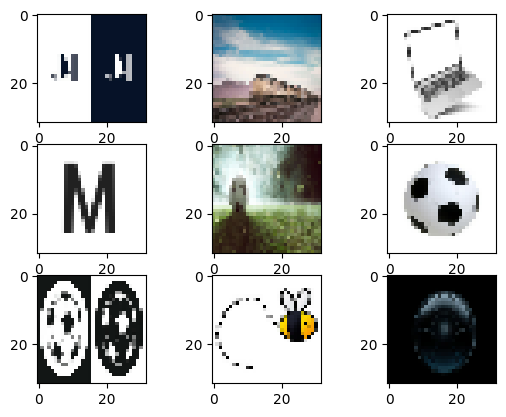

In [910]:
import matplotlib.pyplot as plt

# View few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [911]:
from keras.utils import to_categorical

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
     
# Print 4 examples to check the one-hot encoding
print(y_train[0:4])

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


## 4. Build the model

In [912]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation="softmax"))


## 5. Compile the model

In [913]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_155 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_127 (MaxPool  (None, 15, 15, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_156 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_128 (MaxPool  (None, 6, 6, 64)          0         
 ing2D)                                                          
                                                                 
 flatten_59 (Flatten)        (None, 2304)              0         
                                                                 
 dense_116 (Dense)           (None, 128)             

## 6. Train the model

In [914]:
model.fit(X_train, y_train, 
          epochs=25, 
          batch_size=64, 
          validation_data=(X_test, y_test), 
          verbose=1)


Epoch 1/25
18/18 [==============================] - 3s 70ms/step - loss: 1.7004 - accuracy: 0.2998 - val_loss: 1.5424 - val_accuracy: 0.3475
Epoch 2/25
18/18 [==============================] - 1s 59ms/step - loss: 1.3563 - accuracy: 0.4982 - val_loss: 1.1603 - val_accuracy: 0.6064
Epoch 3/25
18/18 [==============================] - 1s 60ms/step - loss: 1.1950 - accuracy: 0.5552 - val_loss: 1.1744 - val_accuracy: 0.5709
Epoch 4/25
18/18 [==============================] - 1s 61ms/step - loss: 1.0261 - accuracy: 0.6415 - val_loss: 1.0104 - val_accuracy: 0.6348
Epoch 5/25
18/18 [==============================] - 1s 61ms/step - loss: 0.8769 - accuracy: 0.6922 - val_loss: 1.0227 - val_accuracy: 0.6241
Epoch 6/25
18/18 [==============================] - 1s 67ms/step - loss: 0.8209 - accuracy: 0.6868 - val_loss: 0.9902 - val_accuracy: 0.6525
Epoch 7/25
18/18 [==============================] - 1s 62ms/step - loss: 0.7122 - accuracy: 0.7429 - val_loss: 0.8679 - val_accuracy: 0.6950
Epoch 8/25
18

## 7. Evaluate the model on the test set

In [915]:
loss, acc = model.evaluate(X_test, y_test)
print("The accuracy of the model is", round(acc*100, 2), "%.")

9/9 [==============================] - 0s 10ms/step - loss: 1.0644 - accuracy: 0.7234
The accuracy of the model is 72.34 %.


## 8. Make a random prediction

1/1 [==============================] - 0s 109ms/step
The original class is: Football ball
The predicted class is: Football ball


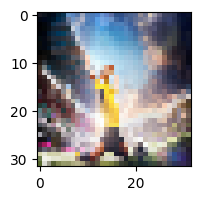

In [916]:
import random

random_number = random.randint(0, len(X_test))
test_image = X_test[random_number]
test_input=np.expand_dims(test_image, 0)
actual= np.argmax(y_test[random_number], axis=None)

y_pred = model.predict(test_input)
prediction = np.argmax(y_pred, axis=None)

# Visualize the test image and display the original and predicted class labels
plt.figure(figsize=(2, 2))
plt.imshow(test_image)

original_label=labels_name[actual]
prediction_label=labels_name[prediction]

print("The original class is:", original_label)
print("The predicted class is:", prediction_label)

